In [1]:
from resources import *

In [2]:
cities = generate_cities(5)

In [3]:
cities

[(76, 7), (1, 36), (33, 24), (62, 71), (98, 33)]

In [4]:
# clean this up to only take a set of coordinates? a little redundant to require x and y considering they are derivatices of coordinates
def exact_solution(coordinates):

    x = [coordinate[0] for coordinate in coordinates]
    y = [coordinate[1] for coordinate in coordinates]
    
    start = time.process_time()

    # Generate a list of all possible combinations or routes from point to point
    combs = itertools.permutations(coordinates, len(coordinates))

    #Iterate through the permutation generator and append each uniquie route to 'routes'. Routes that are identical forward and backwards are removed since they are equal in distance.
    routes = []
    for p in combs:
        if p[0] <= p[-1]:
            routes.append(list(p))

    #For each route, calculate the total distance
    for route in routes:
        distance = 0
        for i in range(len(route)):
            try:
                d = get_distance(route[i][0], route[i][1],route[i+1][0], route[i+1][1])
                distance = distance + d
            except:
                route.append(round(distance,2))
                continue


    end = time.process_time()
    path_count = len(routes)
    process_time = str(end-start)
    print(process_time)
    print('Number of paths generated: ' + str(len(routes)))
    
    #Identify the path of shortest and longest distance
    optimum = min(routes, key = lambda t: t[(len(routes[0])-1)])
    worst = max(routes, key = lambda t: t[(len(routes[0])-1)])
    
    return optimum, worst, x, y, path_count

In [5]:
def exact_solution(coordinates):
    
    x, y = zip(*[(coordinate[0], coordinates[1]) for coordinate in coordinates])
    
    start = time.process_time()

    # Generate a list of all possible combinations or routes from point to point
    combs = itertools.permutations(coordinates, len(coordinates))

    #Iterate through the permutation generator and append each uniquie route to 'routes'.
    #Routes that are identical forward and backwards are removed since they are equal in distance.
    
    routes = []
    for p in combs:
        if p[0] <= p[-1]:
            routes.append(list(p))

    #For each route, calculate the total distance
    for route in routes:
        distance = 0
        for i in range(len(route)):
            try:
                d = get_distance(route[i][0], route[i][1],route[i+1][0], route[i+1][1])
                distance = distance + d
            except:
                route.append(round(distance,2))
                continue


    end = time.process_time()
    path_count = len(routes)
    process_time = str(end-start)
    
    #Identify the path of shortest and longest distance
    optimum = min(routes, key = lambda t: t[(len(routes[0])-1)])
    worst = max(routes, key = lambda t: t[(len(routes[0])-1)])
    

        
    print('Processing time: ' + str(process_time) + " Seconds")
    print('Number of paths generated: ' + str(len(routes)))
    print('Longest solution length: ' + str(worst[(len(worst)-1)]))
    print('Shortest solution length: ' + str(optimum[(len(worst)-1)]))

    graph_route_only(coordinates, optimum)
    plt.title('Optimum Route. Distance: ' + str(optimum[(len(worst)-1)]))
    graph_route_only(coordinates, worst)
    plt.title('Least Optimum Route: ' + str(worst[(len(worst)-1)]))
    return optimum, worst

In [6]:
cities

[(76, 7), (1, 36), (33, 24), (62, 71), (98, 33)]

In [8]:
shortest, longest = exact_solution(coordinates)

NameError: name 'coordinates' is not defined

/Users/tracedelange/opt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


(<Figure size 540x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb6cd4b3f90>)

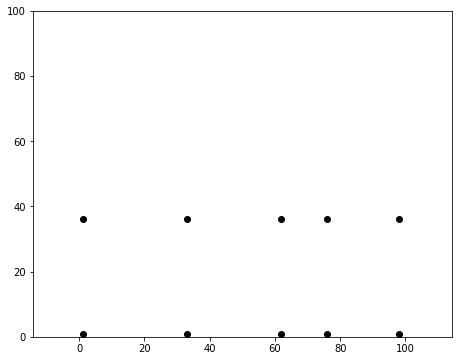

In [9]:
graph_cities(cities)

In [10]:
def graph_route_only(coordinates, route):

    x = [coordinate[0] for coordinate in coordinates]
    y = [coordinate[1] for coordinate in coordinates]
    
    fig, ax = plt.subplots(1, 1, figsize=(7.5,6))

    ax.plot(x, y, 'o', color='black');

    for i in range(len(route)-1):
        try:
            connectpoints(ax, route[i][0],route[i][1],route[i+1][0],route[i+1][1])
        except:
            continue
    plt.xlim(0,100)
    plt.ylim(0,100)
    fig.show()


    return fig, ax

In [11]:
cities = generate_cities(6)

In [12]:
type(cities[0])

tuple

Processing time: 0.006793999999999745 Seconds
Number of paths generated: 360
Longest solution length: 317.78
Shortest solution length: 128.26


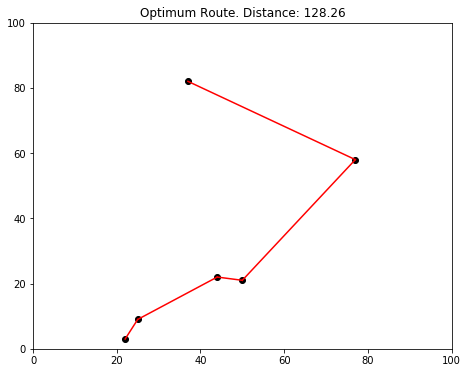

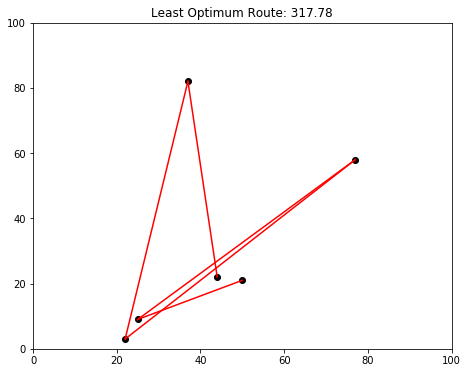

In [13]:
shortest, longest = exact_solution(cities)

In [14]:
coordinates

NameError: name 'coordinates' is not defined

In [ ]:
graph_route_only(coordinates, shortest)
plt.title("Coordinates With Solution")
plt.savefig('coordinates_with_solution.png')

In [15]:
coordinates = [(8, 46), (88, 32), (77, 42), (40, 61), (14, 54)]

In [16]:
type(coordinates[0])

tuple

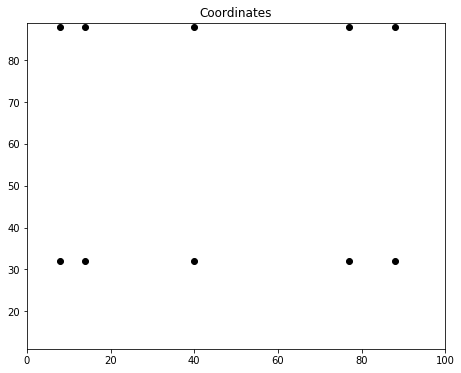

In [17]:
graph_cities(coordinates)
plt.title("Coordinates")
plt.savefig('coordinates.png')

Processing time: 0.0008080000000001419 Seconds
Number of paths generated: 60
Longest solution length: 270.55
Shortest solution length: 93.39


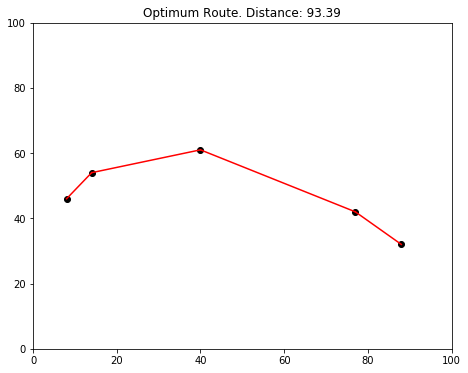

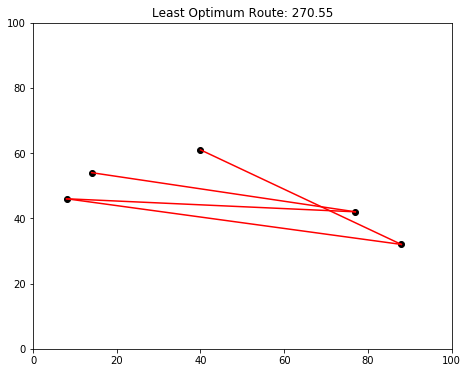

In [18]:
sol = exact_solution(coordinates)

In [19]:
sol[0]

[(8, 46), (14, 54), (40, 61), (77, 42), (88, 32), 93.39]

In [32]:
def exact_solution(coordinates):
    
    x, y = zip(*[(coordinate[0], coordinates[1]) for coordinate in coordinates])
    
    start = time.process_time()

    #1 Generate a list of all possible combinations of routes
    combs = itertools.permutations(coordinates, len(coordinates))

    #2 Iterate through the combinations and append each uniquie route to 'routes'.
    #Routes that are identical forward and backwards are removed since they are equal in distance. 
    routes = []
    for p in combs:
        if p[0] <= p[-1]:
            routes.append(list(p))


    #3 For each unique route, calculate the total distance of the route
    #by summing the distances between each constituent legs of the route
    for route in routes:
        distance = 0
        for i in range(len(route)):
            try:
                d = get_distance(route[i][0], route[i][1],route[i+1][0], route[i+1][1])
                distance = distance + d
            except:
                route.append(round(distance,2))
                continue

    end = time.process_time()
    path_count = len(routes)
    process_time = str(end-start)
    
    #4 Identify the path of shortest and longest distance
    optimum = min(routes, key = lambda t: t[(len(routes[0])-1)])
    worst = max(routes, key = lambda t: t[(len(routes[0])-1)])
    

        
    print('Processing time to find solution: ' + str(process_time) + " Seconds")
    print('Number of paths generated: ' + str(len(routes)))
    print('Longest solution length: ' + str(worst[(len(worst)-1)]))
    print('Shortest solution length: ' + str(optimum[(len(worst)-1)]))

    graph_route_only(coordinates, optimum)
    plt.title('Optimum Route. Distance: ' + str(optimum[(len(worst)-1)]))
    plt.savefig('optimum.png')
    graph_route_only(coordinates, worst)
    plt.title('Least Optimum Route: ' + str(worst[(len(worst)-1)]))
    plt.savefig('least.png')

    return optimum, worst

Processing time to find solution: 0.0009600000000000719 Seconds
Number of paths generated: 60
Longest solution length: 270.55
Shortest solution length: 93.39


([(8, 46), (14, 54), (40, 61), (77, 42), (88, 32), 93.39],
 [(14, 54), (77, 42), (8, 46), (88, 32), (40, 61), 270.55])

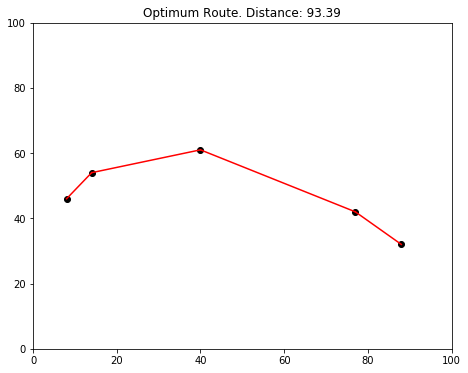

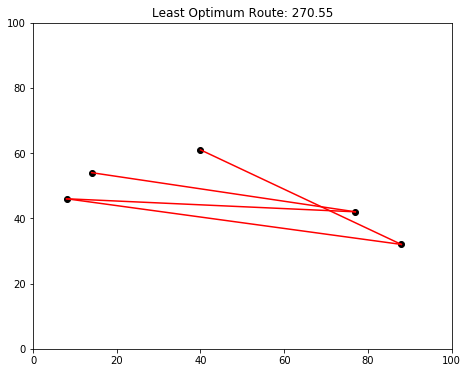

In [21]:
exact_solution(coordinates)

In [28]:
coordinates

[(8, 46), (88, 32), (77, 42), (40, 61), (14, 54)]

In [29]:
coordinates = generate_cities(9)

In [30]:
coordinates

[(84, 56),
 (22, 78),
 (77, 55),
 (72, 87),
 (71, 29),
 (75, 1),
 (54, 5),
 (48, 12),
 (96, 61)]

Processing time to find solution: 3.9375920000000004 Seconds
Number of paths generated: 181440
Longest solution length: 554.9
Shortest solution length: 191.81


([(22, 78),
  (72, 87),
  (96, 61),
  (84, 56),
  (77, 55),
  (71, 29),
  (75, 1),
  (54, 5),
  (48, 12),
  191.81],
 [(77, 55),
  (71, 29),
  (22, 78),
  (75, 1),
  (72, 87),
  (54, 5),
  (96, 61),
  (48, 12),
  (84, 56),
  554.9])

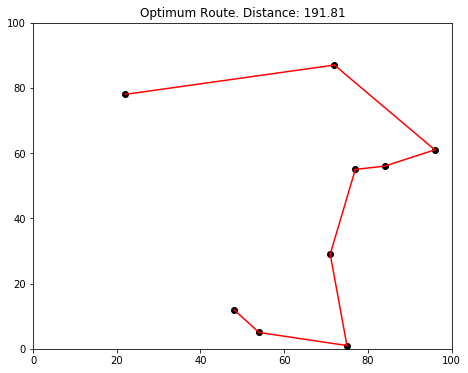

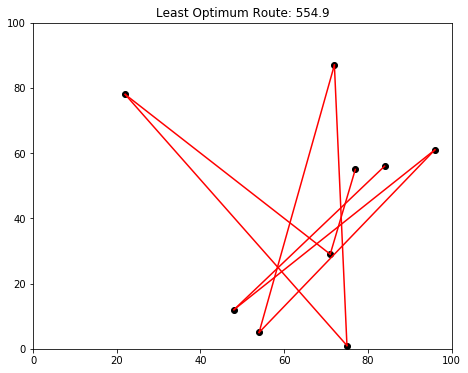

In [33]:
exact_solution(coordinates)

In [36]:
4/0.0008

5000.0

In [37]:
0.0008 * 5000

4.0